# Clustering

In [1]:
import os.path as op

import pandas as pd
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

from scripts.utils import get_path

### Load data and remove participants with nans

In [2]:
# read in data and remove subjects with nans
fig_dir = get_path('figures')

data = pd.read_pickle(op.join(get_path("dataframes"), "sigmoid_data.pkl"))
p50_data = data.drop_duplicates("distance_p50")

df = p50_data.set_index(["paradigm", "pred"])[["participant", "distance_p50"]]
table = df.pivot_table(index=df.index, columns="participant", values="distance_p50")
table.index = [", ".join(x) for x in table.index]
table = table.dropna(axis=1)

In [3]:
#TODO: Add zscoring (by participant?)

### Dimensionality reduction

In [4]:
pca = PCA()
pcs = pca.fit_transform(table)
print(pca.explained_variance_ratio_.cumsum())

[0.5519954  0.78062669 0.87622182 0.92411896 0.95112311 0.97405372
 0.9895793  0.99606463 1.         1.        ]


### Scatter Plot

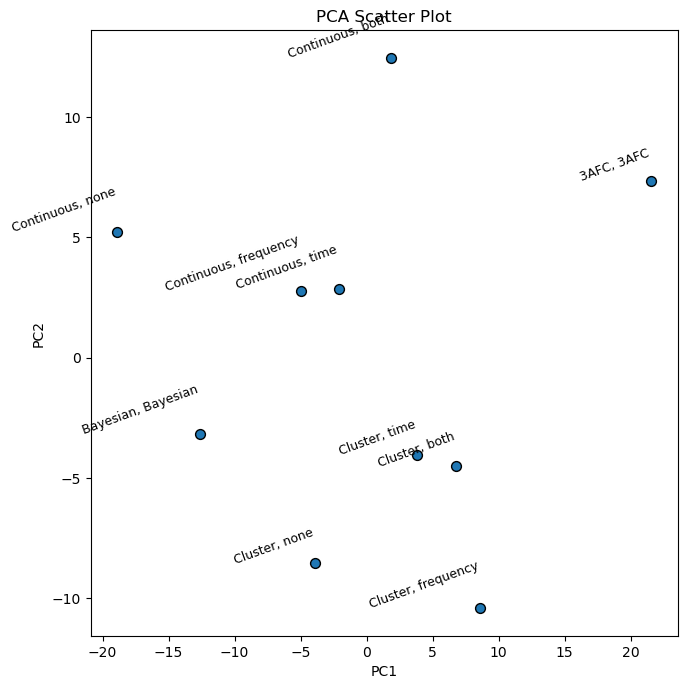

In [5]:
# Scatter plot for the first two principal components
plt.figure(figsize=(7, 7))
plt.scatter(pcs[:, 0], pcs[:, 1], edgecolors='k', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')

# Annotate the points with the paradigm and prediction labels
for i, txt in enumerate(table.index):
    plt.annotate(txt, (pcs[i, 0], pcs[i, 1]), fontsize=9, rotation=20, ha='right')

plt.tight_layout()
# plt.savefig(f'{fig_dir}PCA_scatter_plot.svg')
plt.show()

### Dendogram

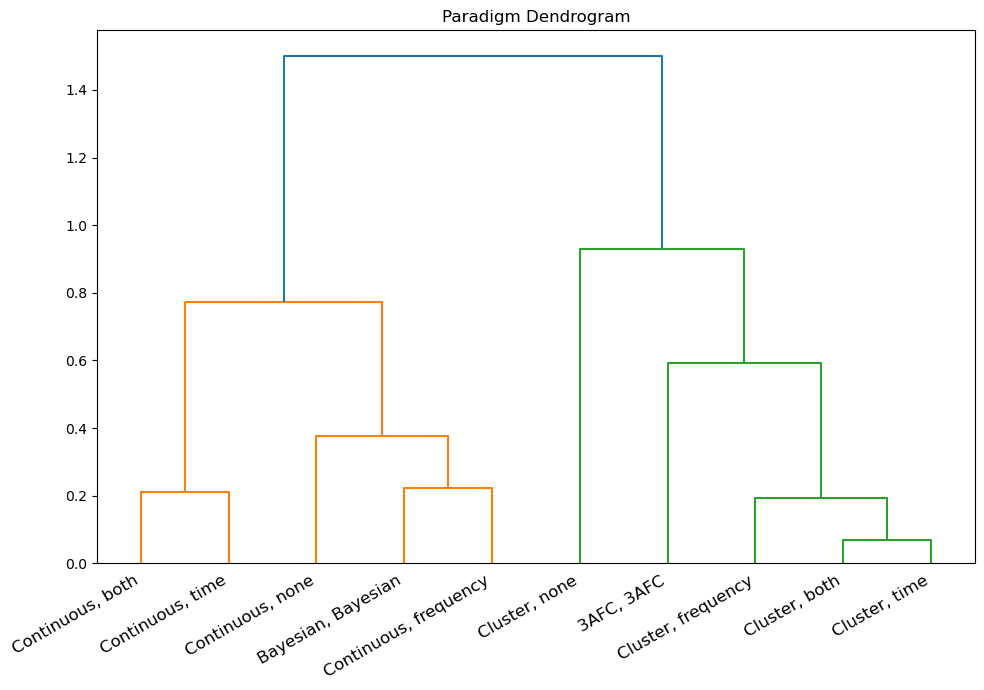

In [6]:
plt.figure(figsize=(10, 7))
# Linking clusters by over all performance
selected_data = pcs[:, :4]  # if you don't want to reduce dimensions:  # table
# use cosine so that you don't worry about mean shifts in data
clusters = shc.linkage(selected_data, method="average", metric="cosine")
shc.dendrogram(Z=clusters, labels=table.index)
plt.xticks(rotation=30, ha="right")
plt.title("Paradigm Dendrogram")
plt.tight_layout()
plt.savefig(op.join(fig_dir, 'Fig4B-paradigm_clustering.svg'))
plt.show()